# **SAVEE Dataset Models**

In [ ]:
!jupyter nbconvert --to html /content/SAVEE_CNN,_LSTM.ipynb

[NbConvertApp] Converting notebook /content/SAVEE_CNN,_LSTM.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 30 image(s).
[NbConvertApp] Writing 6299279 bytes to /content/SAVEE_CNN,_LSTM.html


In [ ]:
!jupyter nbconvert --to html /content/TESS_CNN.ipynb

[NbConvertApp] Converting notebook /content/TESS_CNN.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 26 image(s).
[NbConvertApp] Writing 3540627 bytes to /content/TESS_CNN.html


In [ ]:
!jupyter nbconvert --to html /content/TESS_LSTM.ipynb

[NbConvertApp] Converting notebook /content/TESS_LSTM.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 3082045 bytes to /content/TESS_LSTM.html


#  <center> Importing <center>

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

#  <center> Datasets <center>

In [ ]:
import os
from google.colab import files

# Upload your kaggle.json file (from https://www.kaggle.com/docs/api)
uploaded = files.upload()

# Create the Kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded kaggle.json file to the .kaggle folder
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the file
os.chmod('/root/.kaggle/kaggle.json', 600)


Saving kaggle.json to kaggle.json


In [ ]:
# Download the Surrey Audiovisual Expressed Emotion (SAVEE) dataset
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee


Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors


In [ ]:
import zipfile

with zipfile.ZipFile('surrey-audiovisual-expressed-emotion-savee.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/savee')


In [ ]:

Savee = "/content/savee/ALL/"


In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                           Path
0     fear  /content/savee/ALL/JE_f09.wav
1  neutral  /content/savee/ALL/JE_n08.wav
2  neutral  /content/savee/ALL/JK_n20.wav
3  disgust  /content/savee/ALL/DC_d15.wav
4     fear  /content/savee/ALL/JK_f07.wav

In [ ]:
data_path = pd.concat([Savee_df], axis = 0)

data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                           Path
0     fear  /content/savee/ALL/JE_f09.wav
1  neutral  /content/savee/ALL/JE_n08.wav
2  neutral  /content/savee/ALL/JK_n20.wav
3  disgust  /content/savee/ALL/DC_d15.wav
4     fear  /content/savee/ALL/JK_f07.wav

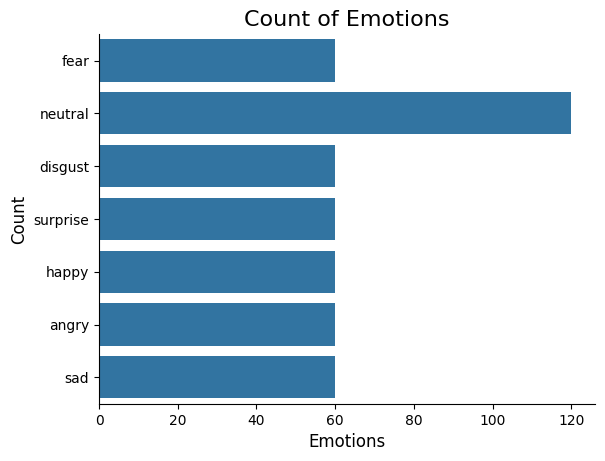

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

#  <center> Waveplot - loudness <center>
#  <center> Spectogram - frequency <center>

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

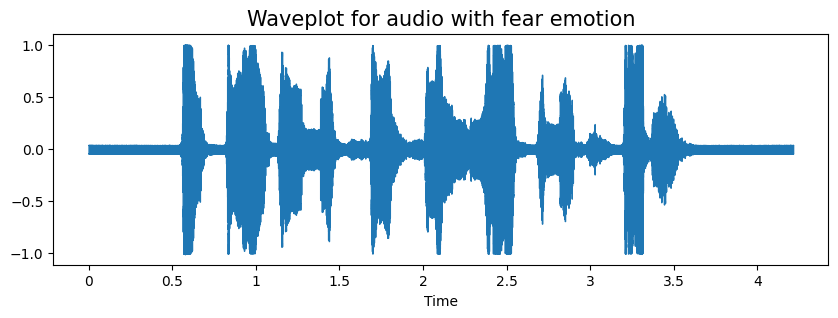

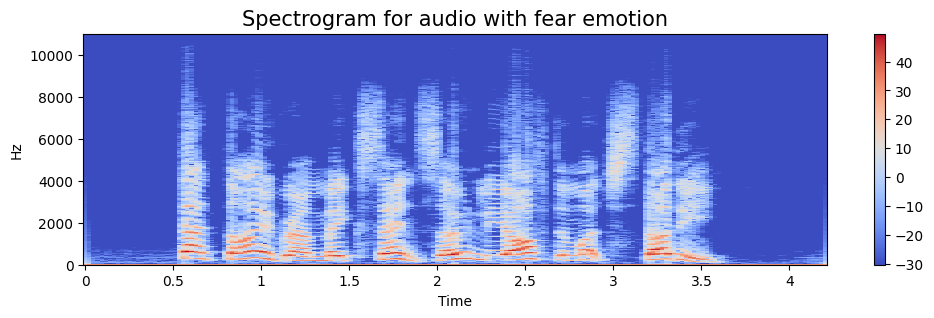

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

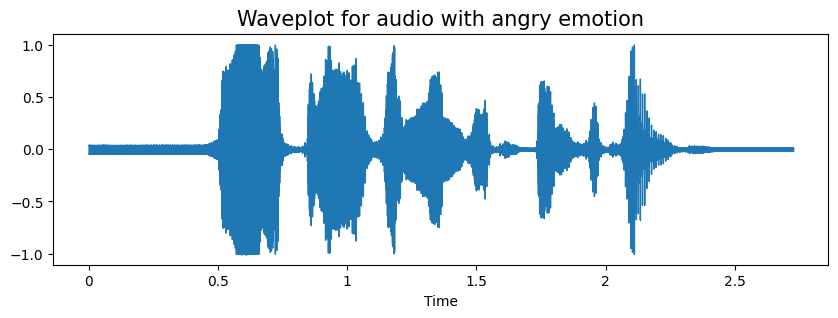

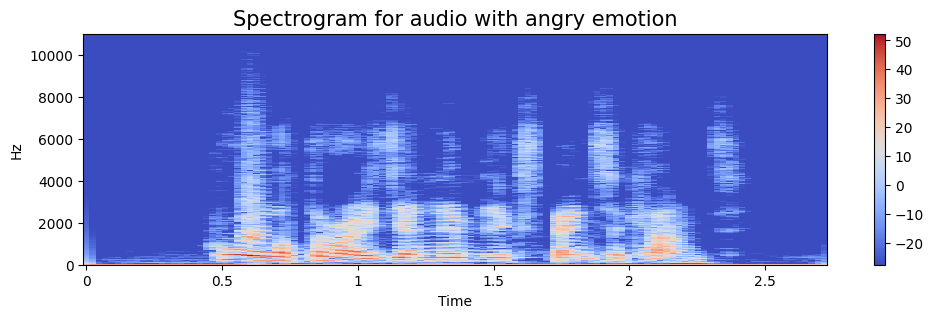

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

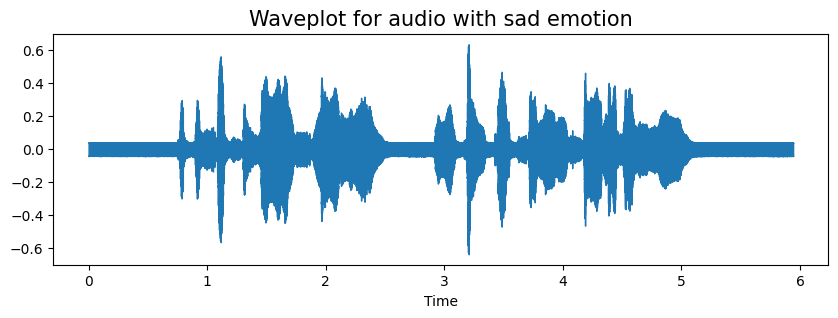

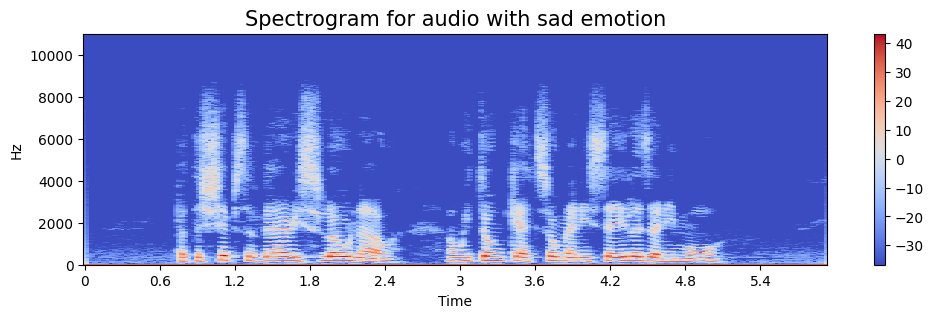

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

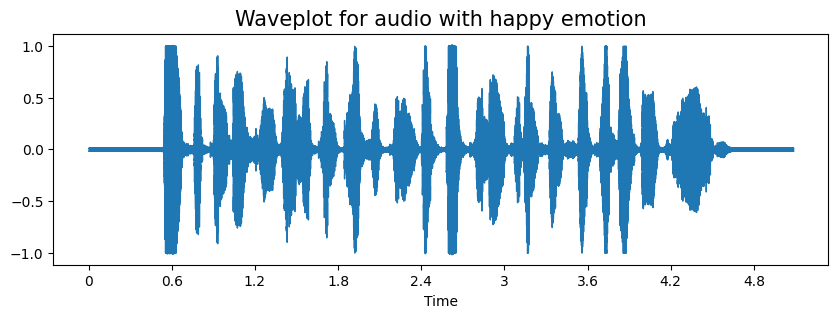

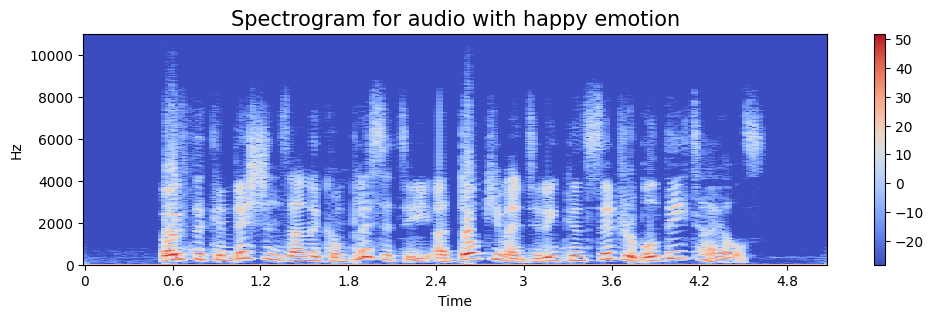

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

#  <center> Data Augmentation <center>

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)  # Use keyword argument for sr

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

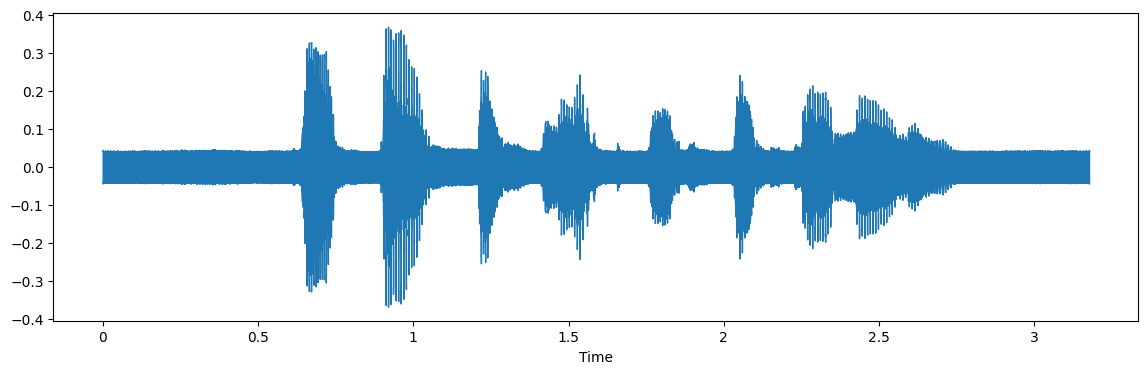

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

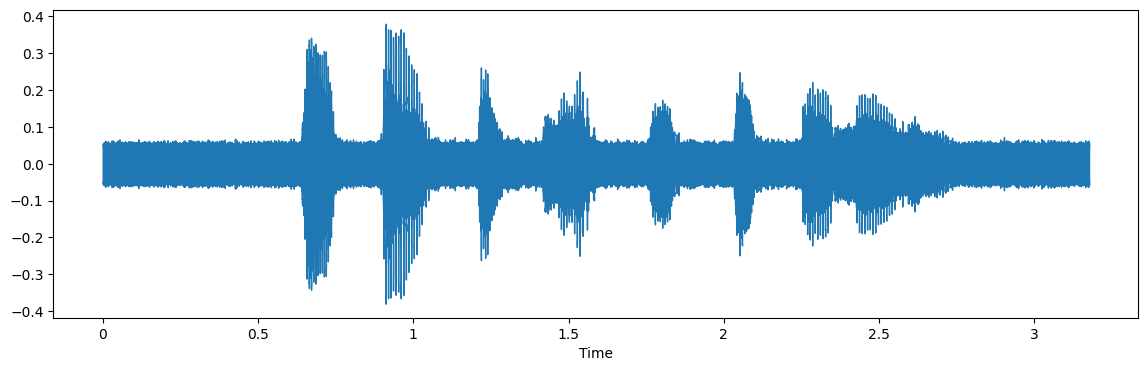

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

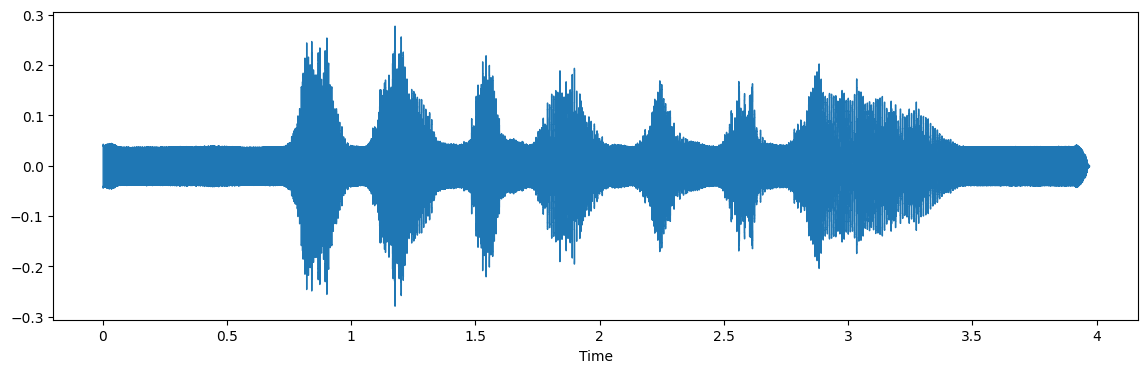

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

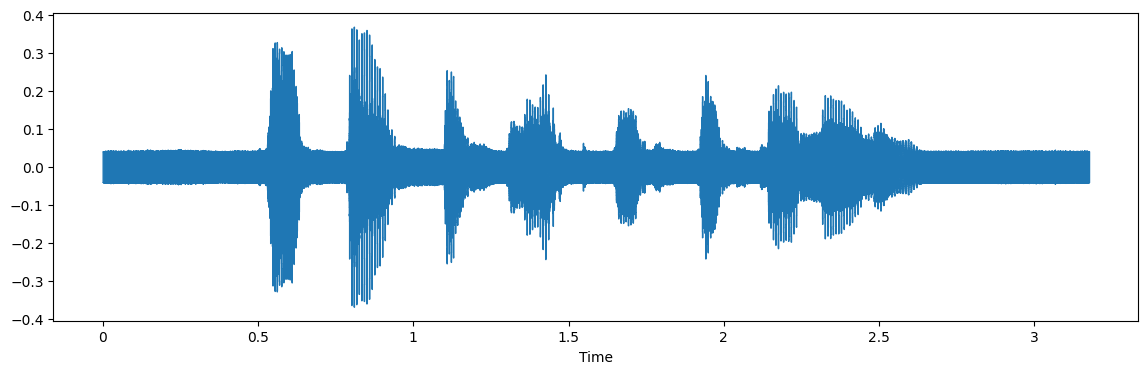

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

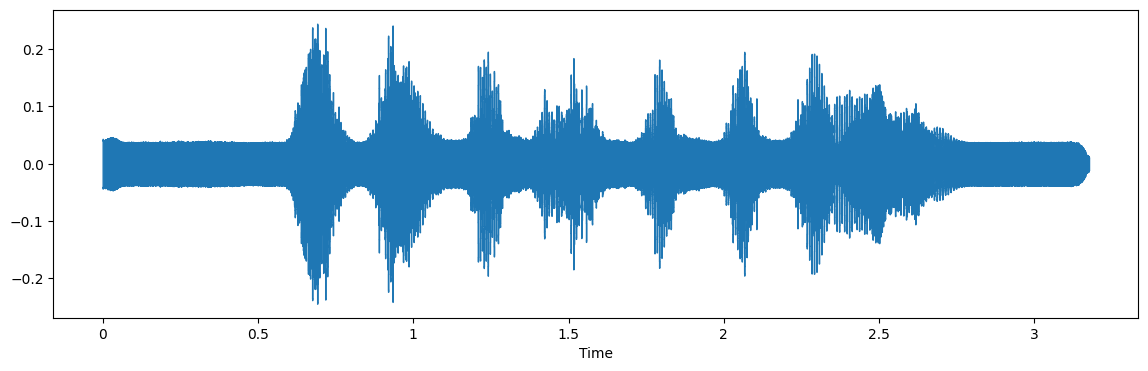

In [ ]:
x = pitch(data, sample_rate, 0.7)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#  <center> Feature Extraction <center>

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

# CNN Dump till before Model

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()


X1 = Features.iloc[: ,:-1].values
Y1 = Features['labels'].values


# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y1 = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


# splitting data
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1080, 162, 1), (1080, 7), (360, 162, 1), (360, 7))

# CNN Base Model

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=Y1.shape[1], activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()


rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,255 (2.13 MB)

 Trainable params: 557,255 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 505ms/step - accuracy: 0.2236 - loss: 1.9161 - val_accuracy: 0.3778 - val_loss: 1.7154 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3063 - loss: 1.7536 - val_accuracy: 0.3889 - val_loss: 1.6404 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3439 - loss: 1.6845 - val_accuracy: 0.4083 - val_loss: 1.5451 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3495 - loss: 1.6079 - val_accuracy: 0.4111 - val_loss: 1.4932 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3950 - loss: 1.5210 - val_accuracy: 0.4389 - val_loss: 1.4386 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3920 - loss: 1.5353 - val_accuracy: 0.4250 - val_loss: 1.4285 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4258 - loss: 1.4702 - val_a

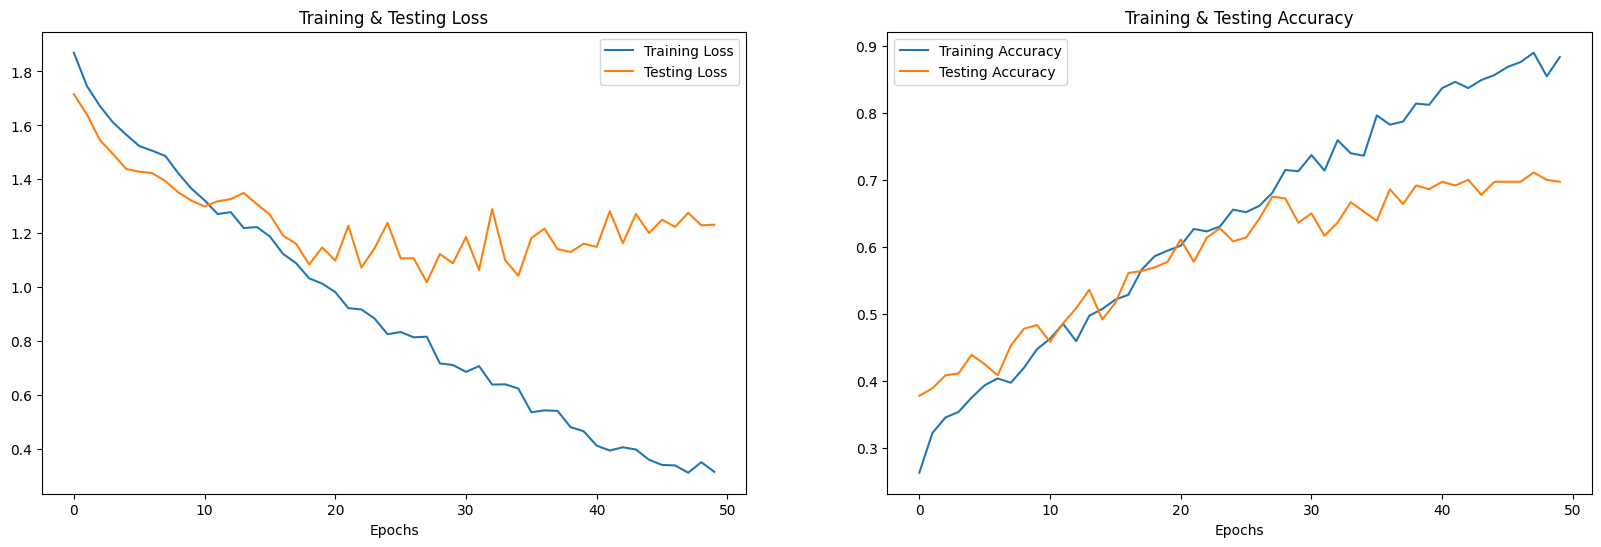

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


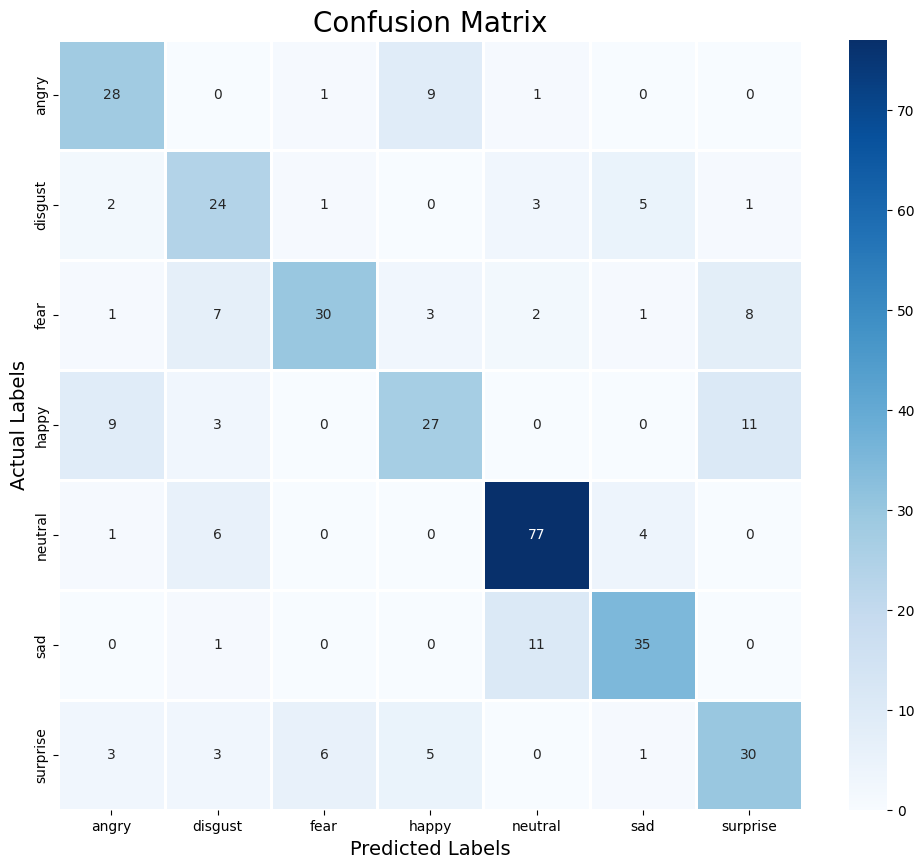

              precision    recall  f1-score   support

       angry       0.64      0.72      0.67        39
     disgust       0.55      0.67      0.60        36
        fear       0.79      0.58      0.67        52
       happy       0.61      0.54      0.57        50
     neutral       0.82      0.88      0.85        88
         sad       0.76      0.74      0.75        47
    surprise       0.60      0.62      0.61        48

    accuracy                           0.70       360
   macro avg       0.68      0.68      0.68       360
weighted avg       0.70      0.70      0.70       360



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization

In [ ]:
from keras.layers import BatchNormalization

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=Y1.shape[1], activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()


rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 162, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 81, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,199 (2.14 MB)

 Trainable params: 558,727 (2.13 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 396ms/step - accuracy: 0.2360 - loss: 2.2008 - val_accuracy: 0.3528 - val_loss: 1.7477 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3143 - loss: 1.8077 - val_accuracy: 0.3028 - val_loss: 1.7330 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3212 - loss: 1.7174 - val_accuracy: 0.2917 - val_loss: 1.7930 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3595 - loss: 1.6537 - val_accuracy: 0.2833 - val_loss: 1.8804 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4001 - loss: 1.5787 - val_accuracy: 0.2750 - val_loss: 2.0797 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3980 - loss: 1.5219 - val_accuracy: 0.2750 - val_loss: 2.1366 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4836 - loss: 1.3830 - val_a

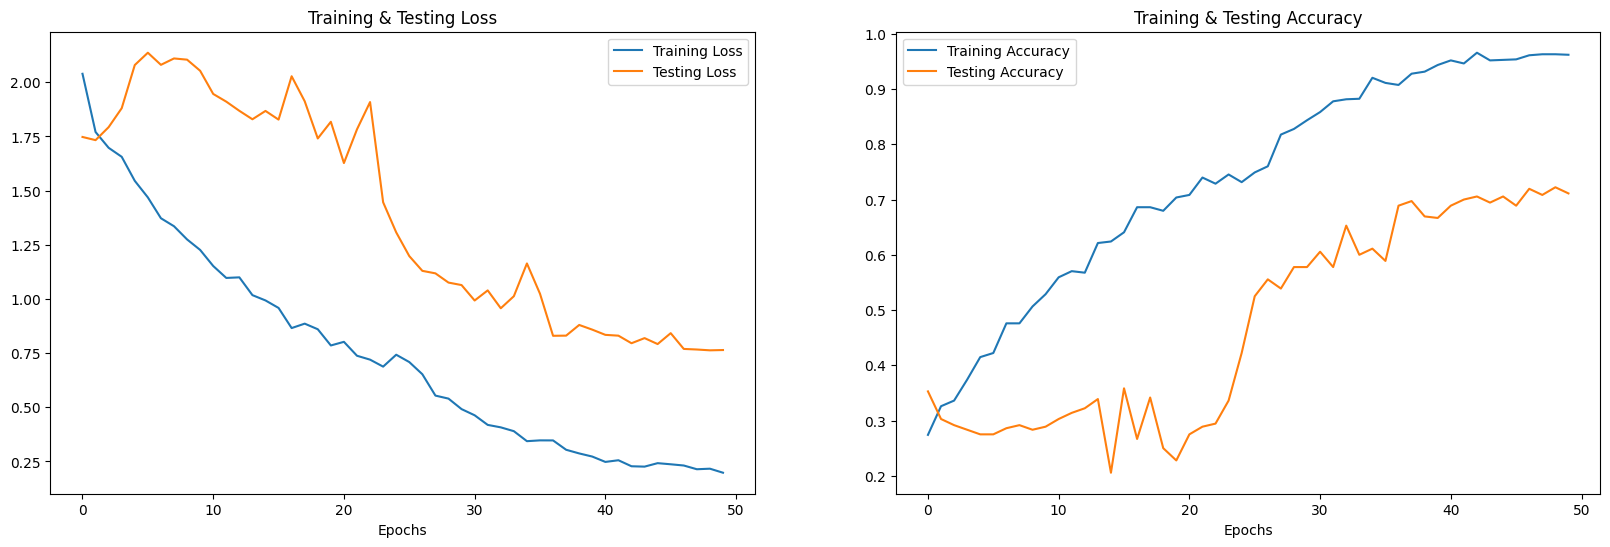

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step


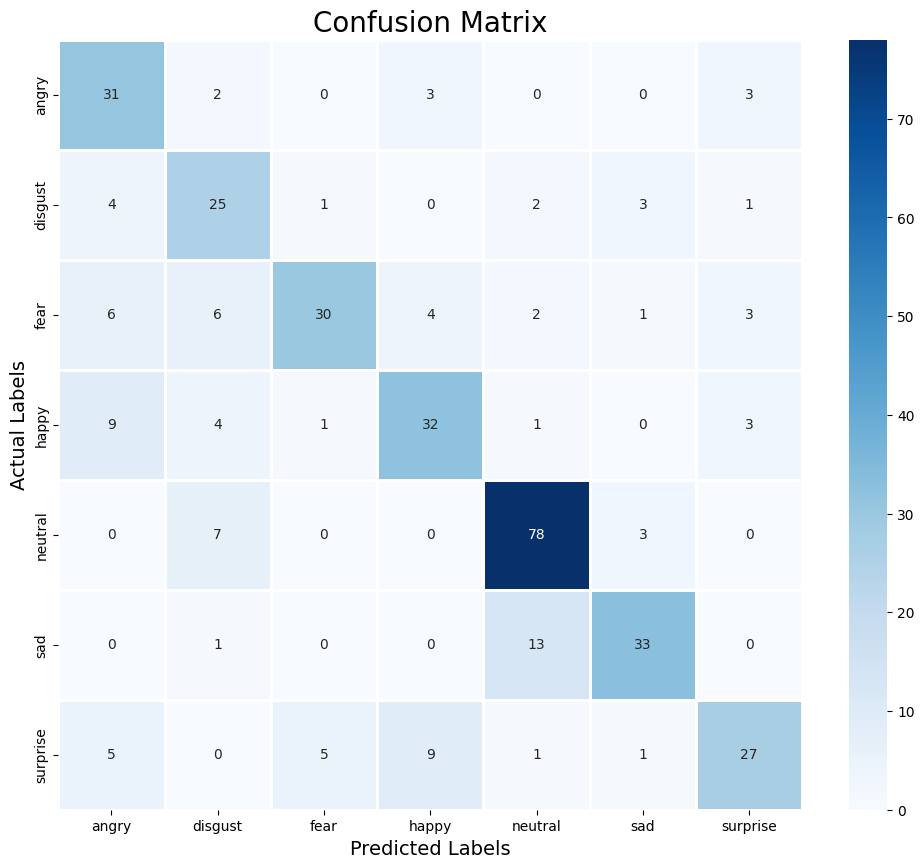

              precision    recall  f1-score   support

       angry       0.56      0.79      0.66        39
     disgust       0.56      0.69      0.62        36
        fear       0.81      0.58      0.67        52
       happy       0.67      0.64      0.65        50
     neutral       0.80      0.89      0.84        88
         sad       0.80      0.70      0.75        47
    surprise       0.73      0.56      0.64        48

    accuracy                           0.71       360
   macro avg       0.71      0.69      0.69       360
weighted avg       0.73      0.71      0.71       360



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling

In [ ]:
model = Sequential()

# Strided Conv instead of MaxPooling
model.add(Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())

model.add(Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units=Y1.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluation
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 81, 256)        │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 81, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 41, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 41, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 21, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 21, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 11, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 11, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 560,199 (2.14 MB)

 Trainable params: 558,727 (2.13 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 801ms/step - accuracy: 0.2687 - loss: 2.1833 - val_accuracy: 0.3528 - val_loss: 1.7845 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.4706 - loss: 1.3858 - val_accuracy: 0.3500 - val_loss: 1.7416 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5991 - loss: 1.0745 - val_accuracy: 0.3500 - val_loss: 1.7236 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6193 - loss: 0.9819 - val_accuracy: 0.4611 - val_loss: 1.7218 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7382 - loss: 0.7985 - val_accuracy: 0.4278 - val_loss: 1.7500 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7539 - loss: 0.7560 - val_accuracy: 0.4639 - val_loss: 1.6823 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8031 - loss: 0.6283 - val_

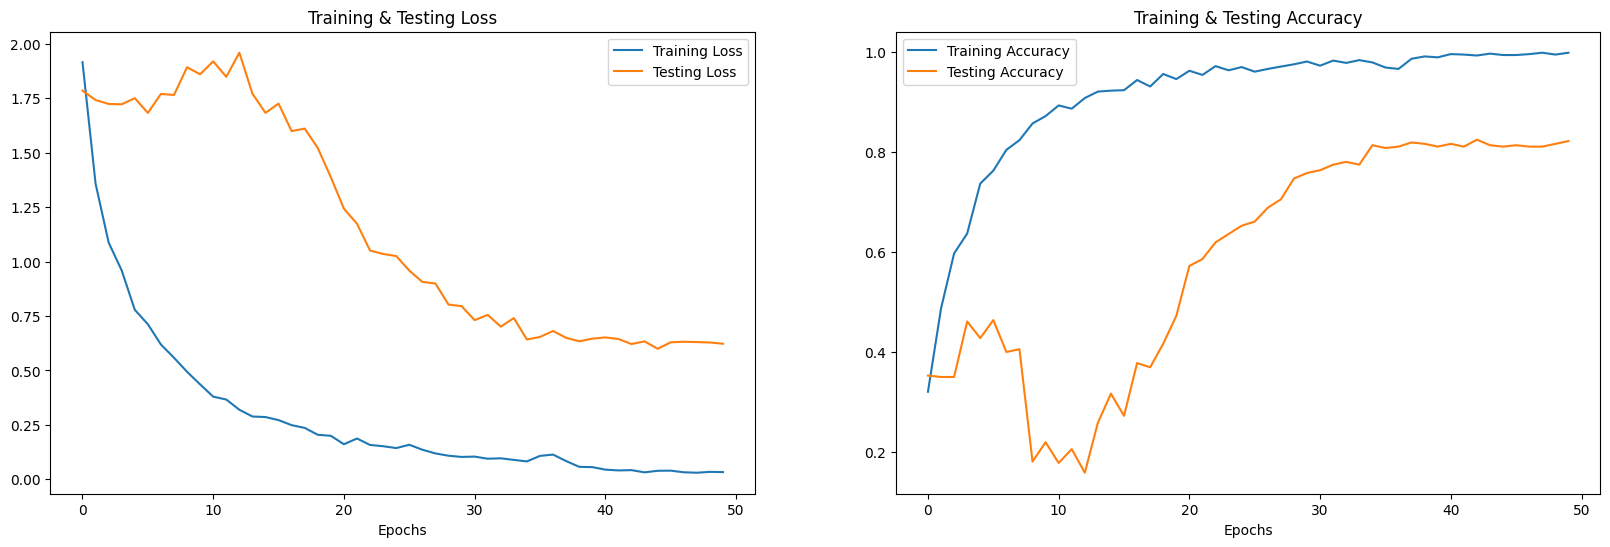

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


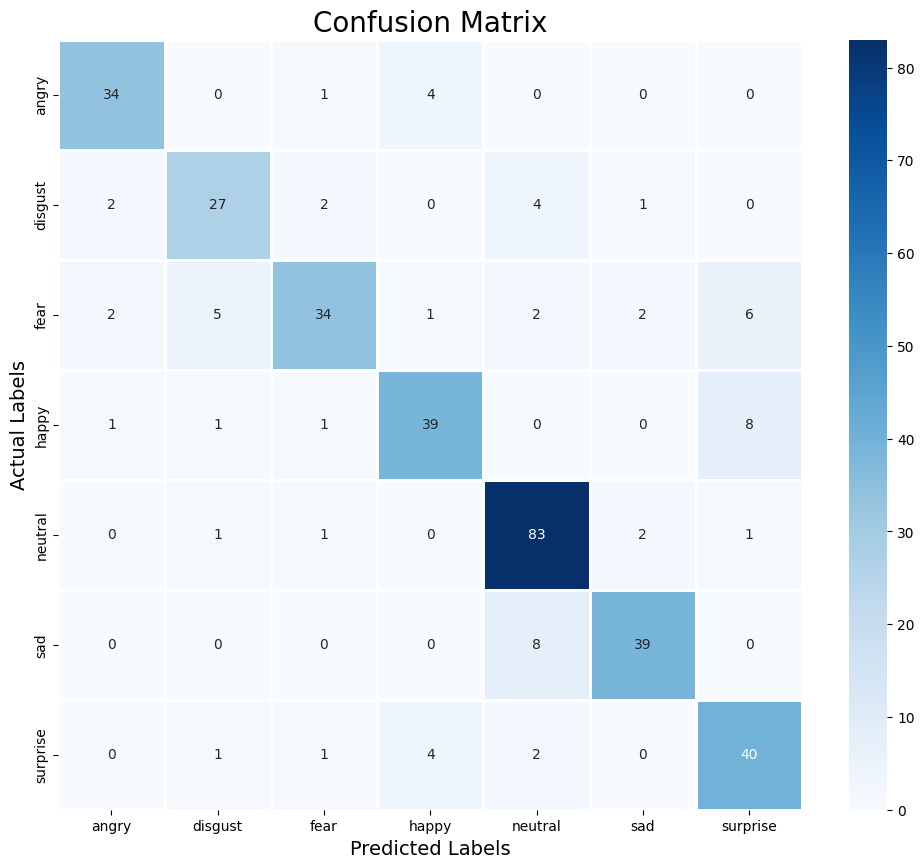

              precision    recall  f1-score   support

       angry       0.87      0.87      0.87        39
     disgust       0.77      0.75      0.76        36
        fear       0.85      0.65      0.74        52
       happy       0.81      0.78      0.80        50
     neutral       0.84      0.94      0.89        88
         sad       0.89      0.83      0.86        47
    surprise       0.73      0.83      0.78        48

    accuracy                           0.82       360
   macro avg       0.82      0.81      0.81       360
weighted avg       0.82      0.82      0.82       360



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling, Attention Mechanism (Squeeze and Excitation)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D, Multiply, Reshape, Input, Activation
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.models import Model
import tensorflow as tf

def squeeze_excite_block(input_tensor, ratio=16):
    """ Squeeze and Excitation block for 1D Convolution """
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling1D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, filters))(se)
    x = Multiply()([input_tensor, se])
    return x

# Input Layer
inputs = Input(shape=(x_train.shape[1], 1))

# Conv Block 1
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 2
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 3
x = Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)
x = Dropout(0.2)(x)

# Conv Block 4
x = Conv1D(64, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Dense Layers
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Output
outputs = Dense(units=Y1.shape[1], activation='softmax')(x)

# Model
model = Model(inputs=inputs, outputs=outputs)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 162, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 81, 256)   │      1,536 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 81, 256)   │      1,024 │ conv1d_22[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 256)       │      4,352 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 256)    │          0 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 81, 256)   │          0 │ batch_normalizat… │
│                     │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 41, 256)   │    327,936 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 41, 256)   │      1,024 │ conv1d_23[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 256)       │      4,352 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 256)    │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 41, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 21, 128)   │    163,968 │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 128)   │        512 │ conv1d_24[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 8)         │      1,032 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 128)       │      1,152 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 579,891 (2.21 MB)

 Trainable params: 578,419 (2.21 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 601ms/step - accuracy: 0.3120 - loss: 1.9481 - val_accuracy: 0.2611 - val_loss: 1.9217 - learning_rate: 0.0010
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4770 - loss: 1.3596 - val_accuracy: 0.2556 - val_loss: 1.9092 - learning_rate: 0.0010
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5970 - loss: 1.1020 - val_accuracy: 0.2861 - val_loss: 1.9077 - learning_rate: 0.0010
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6673 - loss: 0.9208 - val_accuracy: 0.3000 - val_loss: 1.8951 - learning_rate: 0.0010
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7261 - loss: 0.8207 - val_accuracy: 0.3111 - val_loss: 1.8744 - learning_rate: 0.0010
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7694 - loss: 0.7136 - val_accuracy: 0.3056 - val_loss: 1.8539 - learning_rate: 0.0010
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8004 - loss: 0.6031 - val_

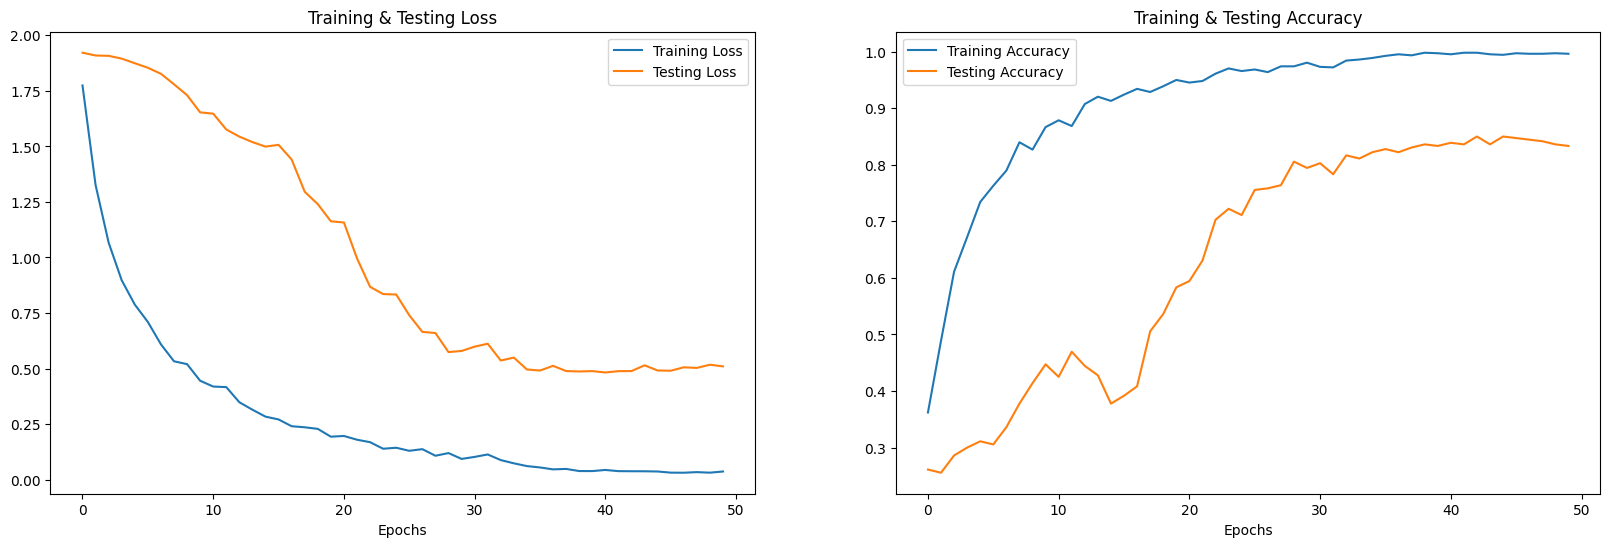

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


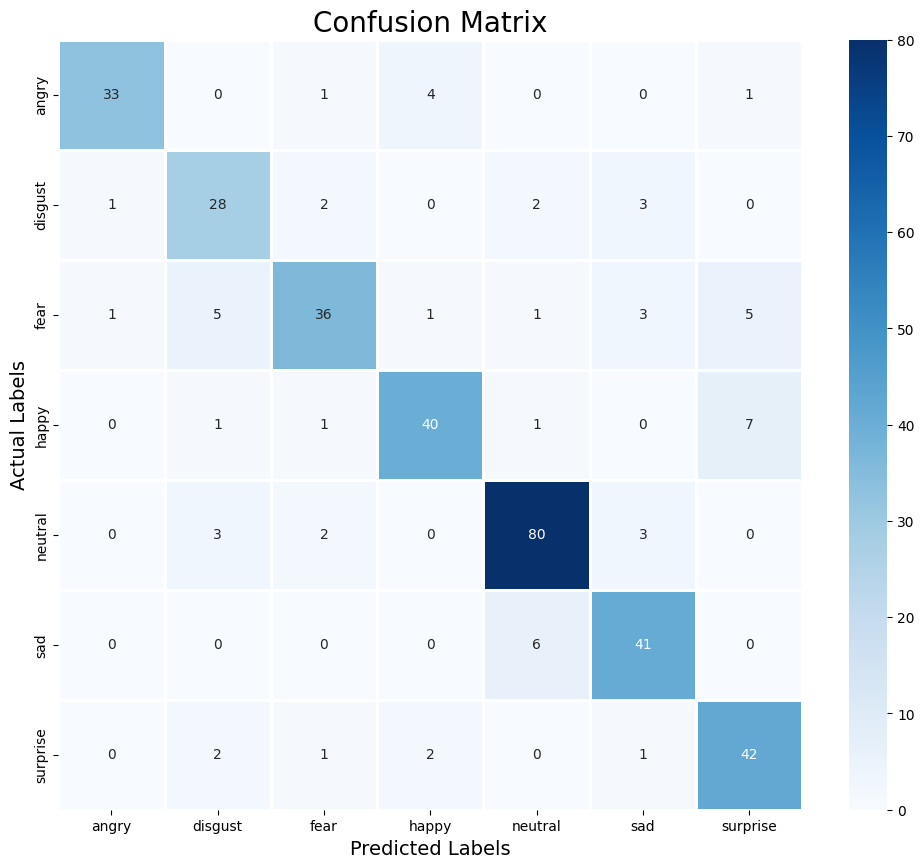

              precision    recall  f1-score   support

       angry       0.94      0.85      0.89        39
     disgust       0.72      0.78      0.75        36
        fear       0.84      0.69      0.76        52
       happy       0.85      0.80      0.82        50
     neutral       0.89      0.91      0.90        88
         sad       0.80      0.87      0.84        47
    surprise       0.76      0.88      0.82        48

    accuracy                           0.83       360
   macro avg       0.83      0.82      0.82       360
weighted avg       0.84      0.83      0.83       360



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling, Attention Mechanism (Squeeze and Excitation), Learning Rate = 0.0009

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D, Multiply, Reshape, Input, Activation
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.models import Model
from keras.optimizers import Adam

def squeeze_excite_block(input_tensor, ratio=16):
    """ Squeeze and Excitation block for 1D Convolution """
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling1D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, filters))(se)
    x = Multiply()([input_tensor, se])
    return x

# Input Layer
inputs = Input(shape=(x_train.shape[1], 1))

# Conv Block 1
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 2
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 3
x = Conv1D(128, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)
x = Dropout(0.2)(x)

# Conv Block 4
x = Conv1D(64, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Dense Layers
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Output
outputs = Dense(units=Y1.shape[1], activation='softmax')(x)

# Model
model = Model(inputs=inputs, outputs=outputs)

# Compile
optimizer = Adam(learning_rate=0.0009)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

# Evaluate
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

Model: "functional_78"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 162, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_50 (Conv1D)  │ (None, 81, 256)   │      1,536 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 81, 256)   │      1,024 │ conv1d_50[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_80 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_81 (Dense)    │ (None, 256)       │      4,352 │ dense_80[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_28          │ (None, 1, 256)    │          0 │ dense_81[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_28         │ (None, 81, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_28[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_51 (Conv1D)  │ (None, 41, 256)   │    327,936 │ multiply_28[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 41, 256)   │      1,024 │ conv1d_51[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_83 (Dense)    │ (None, 256)       │      4,352 │ dense_82[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_29          │ (None, 1, 256)    │          0 │ dense_83[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_29         │ (None, 41, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_52 (Conv1D)  │ (None, 21, 128)   │    163,968 │ multiply_29[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 128)   │        512 │ conv1d_52[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_84 (Dense)    │ (None, 8)         │      1,032 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 579,891 (2.21 MB)

 Trainable params: 578,419 (2.21 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 726ms/step - accuracy: 0.2612 - loss: 2.1569 - val_accuracy: 0.2556 - val_loss: 1.9240 - learning_rate: 9.0000e-04
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4906 - loss: 1.4009 - val_accuracy: 0.2611 - val_loss: 1.9169 - learning_rate: 9.0000e-04
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5738 - loss: 1.1175 - val_accuracy: 0.2806 - val_loss: 1.9319 - learning_rate: 9.0000e-04
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6657 - loss: 0.9356 - val_accuracy: 0.2194 - val_loss: 1.9477 - learning_rate: 9.0000e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6984 - loss: 0.8175 - val_accuracy: 0.1056 - val_loss: 1.9737 - learning_rate: 9.0000e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7626 - loss: 0.6963 - val_accuracy: 0.1056 - val_loss: 1.9858 - learning_rate: 9.0000e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.799

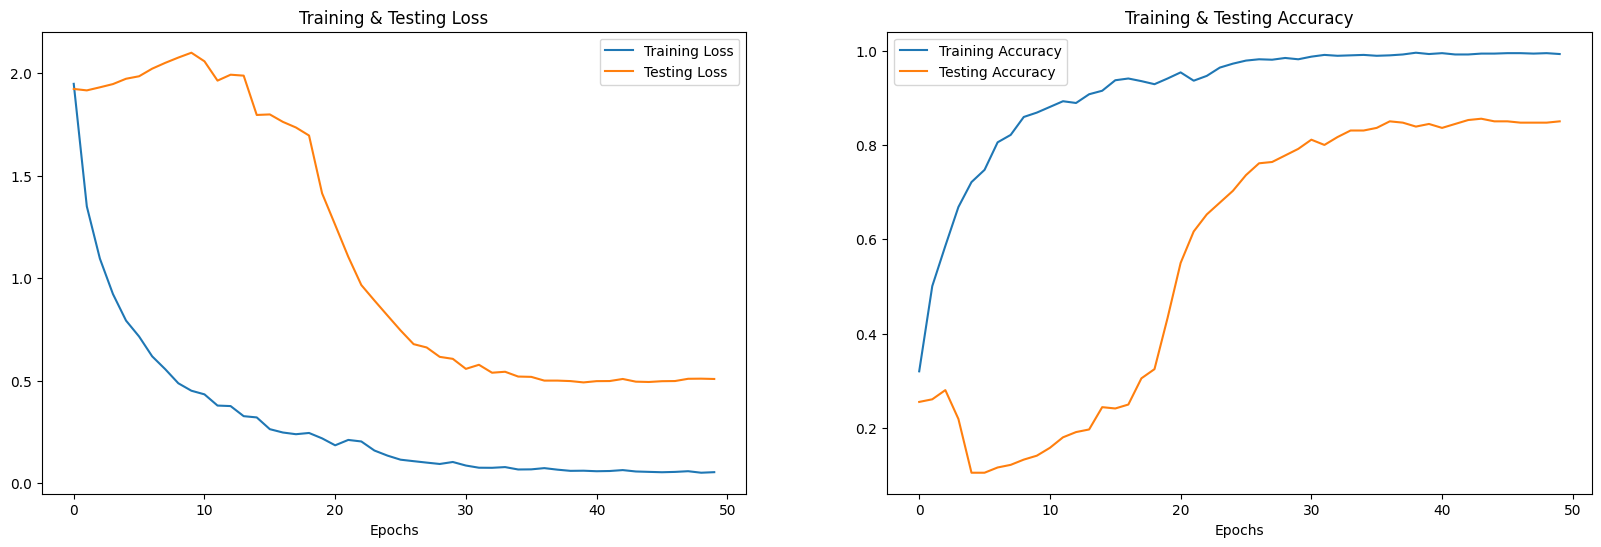

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step


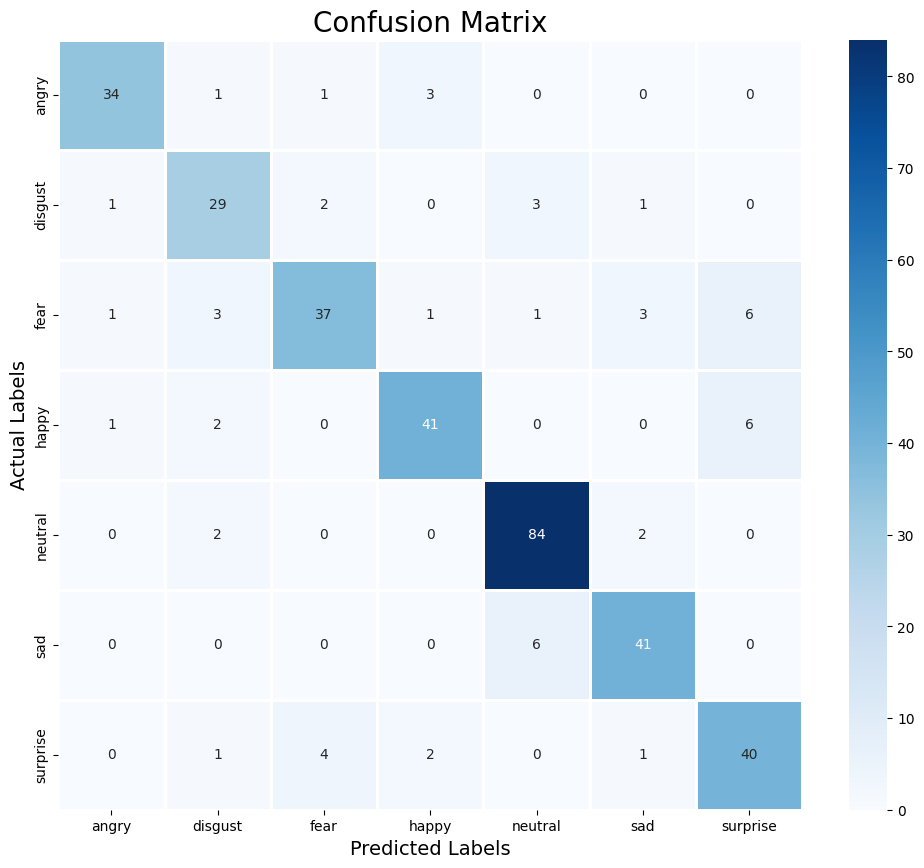

              precision    recall  f1-score   support

       angry       0.92      0.87      0.89        39
     disgust       0.76      0.81      0.78        36
        fear       0.84      0.71      0.77        52
       happy       0.87      0.82      0.85        50
     neutral       0.89      0.95      0.92        88
         sad       0.85      0.87      0.86        47
    surprise       0.77      0.83      0.80        48

    accuracy                           0.85       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.85      0.85       360



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

BatchNormalization, Strided Convolution instead of MaxPooling, Attention Mechanism (Squeeze and Excitation), Learning Rate = 0.0009, Activation = LeakyRelu

In [ ]:
from keras.models import Model
from keras.layers import Conv1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D, Multiply, Reshape, Input
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.optimizers import Adam

def squeeze_excite_block(input_tensor, ratio=16):
    """ Squeeze and Excitation block for 1D Convolution """
    filters = input_tensor.shape[-1]
    se = GlobalAveragePooling1D()(input_tensor)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    se = Reshape((1, filters))(se)
    x = Multiply()([input_tensor, se])
    return x

# Input Layer
inputs = Input(shape=(x_train.shape[1], 1))

# Conv Block 1
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(inputs)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 2
x = Conv1D(256, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Conv Block 3
x = Conv1D(128, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)
x = Dropout(0.3)(x)

# Conv Block 4
x = Conv1D(64, kernel_size=5, strides=2, padding='same', activation='leaky_relu')(x)
x = BatchNormalization()(x)
x = squeeze_excite_block(x)

# Dense Layers
x = Flatten()(x)
x = Dense(32, activation='leaky_relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

# Output
outputs = Dense(units=Y1.shape[1], activation='softmax')(x)

# Model
model = Model(inputs=inputs, outputs=outputs)

# Compile with label smoothing
optimizer = Adam(learning_rate=0.0009)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  # Added label smoothing
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Train the model
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=1e-7)
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[rlrp]
)

# Evaluate the model
print("Accuracy of our model on test data:", model.evaluate(x_test, y_test)[1] * 100, "%")

Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 162, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_74 (Conv1D)  │ (None, 81, 256)   │      1,536 │ input_layer_18[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 81, 256)   │      1,024 │ conv1d_74[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_140 (Dense)   │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_141 (Dense)   │ (None, 256)       │      4,352 │ dense_140[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_52          │ (None, 1, 256)    │          0 │ dense_141[0][0]   │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_52         │ (None, 81, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_52[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_75 (Conv1D)  │ (None, 41, 256)   │    327,936 │ multiply_52[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 41, 256)   │      1,024 │ conv1d_75[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_142 (Dense)   │ (None, 16)        │      4,112 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_143 (Dense)   │ (None, 256)       │      4,352 │ dense_142[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_53          │ (None, 1, 256)    │          0 │ dense_143[0][0]   │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_53         │ (None, 41, 256)   │          0 │ batch_normalizat… │
│ (Multiply)          │                   │            │ reshape_53[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_76 (Conv1D)  │ (None, 21, 128)   │    163,968 │ multiply_53[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 21, 128)   │        512 │ conv1d_76[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ batch_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_144 (Dense)   │ (None, 8)         │      1,032 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 579,891 (2.21 MB)

 Trainable params: 578,419 (2.21 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 827ms/step - accuracy: 0.2545 - loss: 2.0900 - val_accuracy: 0.2833 - val_loss: 1.9271 - learning_rate: 9.0000e-04
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5035 - loss: 1.4700 - val_accuracy: 0.2639 - val_loss: 1.9187 - learning_rate: 9.0000e-04
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5624 - loss: 1.3234 - val_accuracy: 0.2528 - val_loss: 1.9181 - learning_rate: 9.0000e-04
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6359 - loss: 1.2262 - val_accuracy: 0.3000 - val_loss: 1.9165 - learning_rate: 9.0000e-04
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7107 - loss: 1.0952 - val_accuracy: 0.3000 - val_loss: 1.8985 - learning_rate: 9.0000e-04
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7195 - loss: 1.0691 - val_accuracy: 0.3056 - val_loss: 1.8779 - learning_rate: 9.0000e-04
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.76

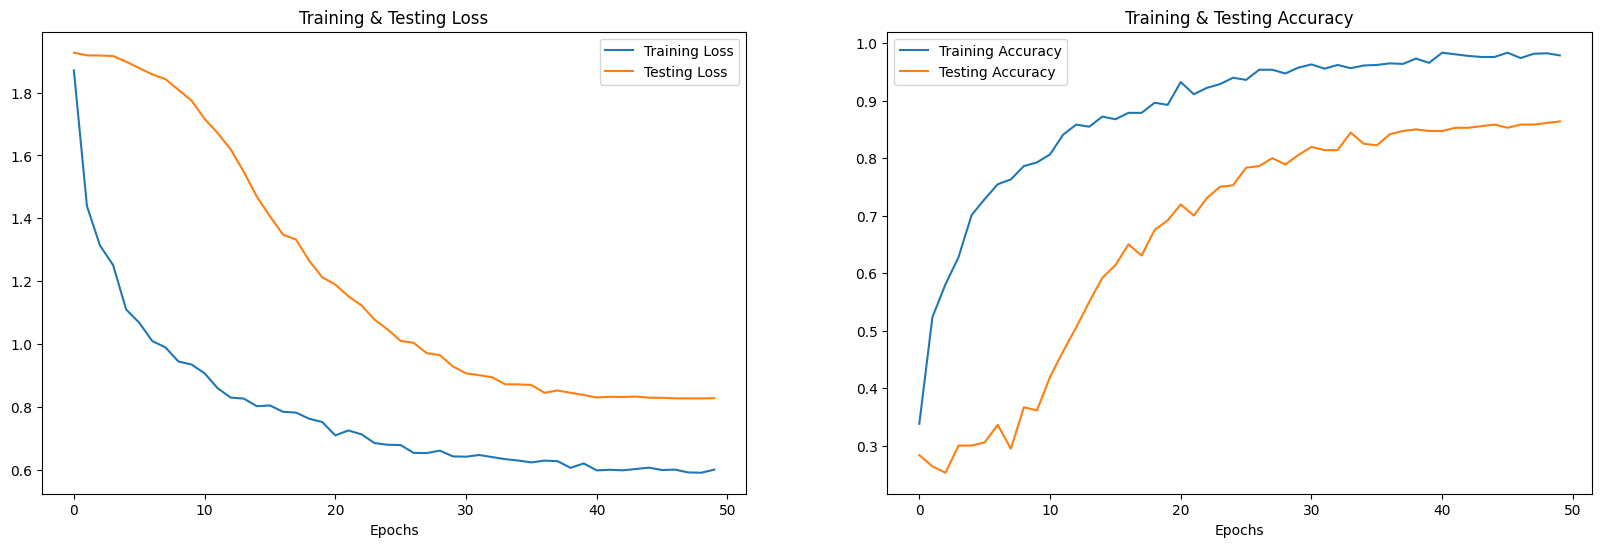

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


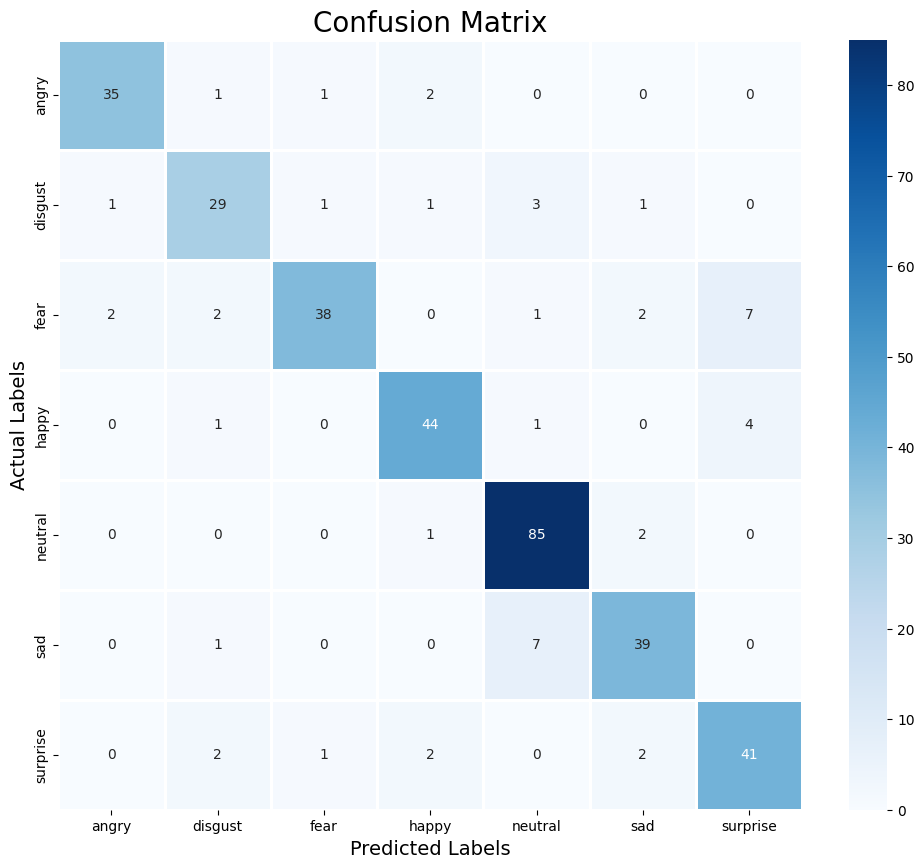

              precision    recall  f1-score   support

       angry       0.92      0.90      0.91        39
     disgust       0.81      0.81      0.81        36
        fear       0.93      0.73      0.82        52
       happy       0.88      0.88      0.88        50
     neutral       0.88      0.97      0.92        88
         sad       0.85      0.83      0.84        47
    surprise       0.79      0.85      0.82        48

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.86       360
weighted avg       0.87      0.86      0.86       360



In [ ]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()



# predicting on test data.
pred_test1 = model.predict(x_test)
y_pred1 = encoder.inverse_transform(pred_test1)

y_test1 = encoder.inverse_transform(y_test)



df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred1.flatten()
df['Actual Labels'] = y_test1.flatten()
df.head(10)


cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()



print(classification_report(y_test1, y_pred1))

# LSTM dump till before model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
#import time

# Combine emotion labels from each dataframe
#labels = list(Ravdess_df['Emotions']) + list(Crema_df['Emotions']) + list(Tess_df['Emotions']) + list(Savee_df['Emotions'])
labels = list(Savee_df['Emotions'])

# Encode labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

# Combine paths from all dataframes
#paths = '''list(Ravdess_df['Path']) + list(Crema_df['Path']) + list(Tess_df['Path']) +''' list(Savee_df['Path'])
paths = list(Savee_df['Path'])

features = []

for path in paths:

    feature_set = get_features(path)

    if feature_set is not None and len(feature_set) > 0:
        features.append(feature_set)


print(f"Number of features extracted: {len(features)}")

# Trim y to match the number of features
y = y[:len(features)]

# Convert to NumPy array and prepare for model input
features = np.array(features)
features = features.reshape(features.shape[0], -1)  # Flatten for standard scaling

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Reshape X to be 3D for LSTM input: (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Number of features extracted: 480


# LSTM Base Model

In [ ]:
# Define the LSTM model
model = Sequential()

# First LSTM layer with Dropout and Batch Normalization
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Second LSTM layer
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Fully connected dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer with softmax activation
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model checkpoint to save the best model during training
checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

# Load the best model
model.load_weights('best_lstm_model.keras')

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Print the accuracy of the model on test data
accuracy = model.evaluate(X_test, y_test)[1] * 100
print("Accuracy of our model on test data : ", accuracy, "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.1641 - loss: 2.3303 - val_accuracy: 0.1429 - val_loss: 1.9375
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1999 - loss: 2.1890 - val_accuracy: 0.1299 - val_loss: 1.9383
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1838 - loss: 2.1465 - val_accuracy: 0.0909 - val_loss: 1.9446
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.1993 - loss: 2.0522 - val_accuracy: 0.0779 - val_loss: 1.9624
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1910 - loss: 2.0928 - val_accuracy: 0.1299 - val_loss: 1.9561
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2574 - loss: 2.0095 - val_accuracy: 0.1948 - val_loss: 1.9503
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2283 - loss: 1.9678 - val_accuracy: 0.1169 - val_loss: 1.9466
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.2578 - loss: 1.9427 - val_accuracy: 0.0779 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


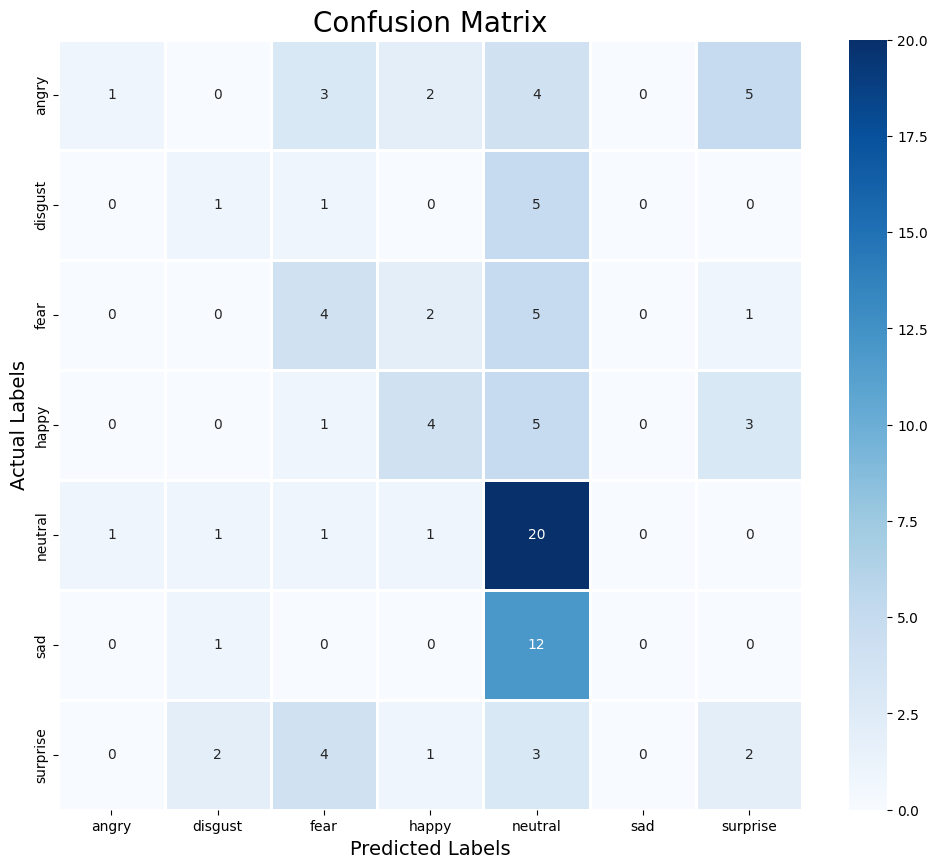

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3307 - loss: 1.7316
Accuracy of our model on test data :  33.33333432674408 %


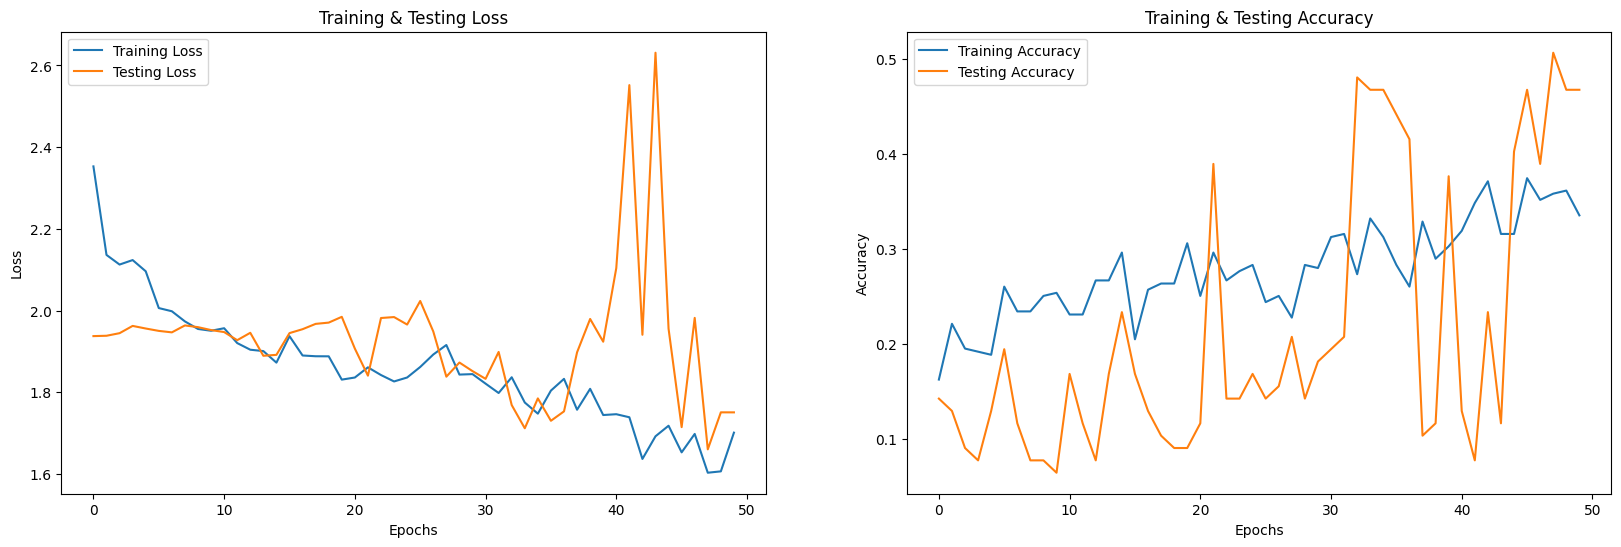

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))

# Modify the line below according to your label encoder
cm = pd.DataFrame(cm, index=[i for i in label_encoder.classes_], columns=[i for i in label_encoder.classes_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='g')  # Use 'g' for integer annotation
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Plotting training and testing loss and accuracy
epochs = [i for i in range(len(history.history['loss']))]  # Update to the number of epochs used
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)

# Plot for Loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

# Plot for Accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.show()

Attention Layer

In [ ]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=ed7c9bc0dc7015b5be119218156faedfb1796a66d22d03957c6aabf27850ffb7
  Stored in directory: /root/.cache/pip/wheels/46/f9/96/709295c836133071c12a300729fed4027757f889c01695feea
Successfully built keras-self-attention


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Attention Layer
model.add(SeqSelfAttention(attention_activation='sigmoid'))

# Second LSTM layer
model.add(LSTM(128, return_sequences=True))  # Still returning sequences for attention pooling
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Reduce to fixed-size vector
model.add(GlobalAveragePooling1D())  # This turns (None, timesteps, features) → (None, features)

# Dense Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Checkpoint
checkpoint = ModelCheckpoint('best_lstm_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

# Evaluate
model.load_weights('best_lstm_model.keras')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Accuracy
accuracy = model.evaluate(X_test, y_test)[1] * 100
print("Accuracy of our model on test data:", accuracy, "%")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 486, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 486, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_162         │ (None, 486, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seq_self_attention_1            │ (None, 486, 128)       │         8,257 │
│ (SeqSelfAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 486, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 486, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_163         │ (None, 486, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_115    │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_298 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_299 (Dense)               │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,136 (844.28 KB)

 Trainable params: 215,624 (842.28 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 309ms/step - accuracy: 0.1703 - loss: 2.2588 - val_accuracy: 0.4026 - val_loss: 1.9208
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.2616 - loss: 1.9145 - val_accuracy: 0.4026 - val_loss: 1.9138
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.2710 - loss: 1.8677 - val_accuracy: 0.3766 - val_loss: 1.8917
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.2352 - loss: 1.9023 - val_accuracy: 0.3766 - val_loss: 1.8664
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.2530 - loss: 1.8332 - val_accuracy: 0.3766 - val_loss: 1.8485
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.2593 - loss: 1.7739 - val_accuracy: 0.3896 - val_loss: 1.8289
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.2834 - loss: 1.8048 - val_accuracy: 0.3896 - val_loss: 1.8067
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.2663 - loss: 1.8124 - val_accuracy: 0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


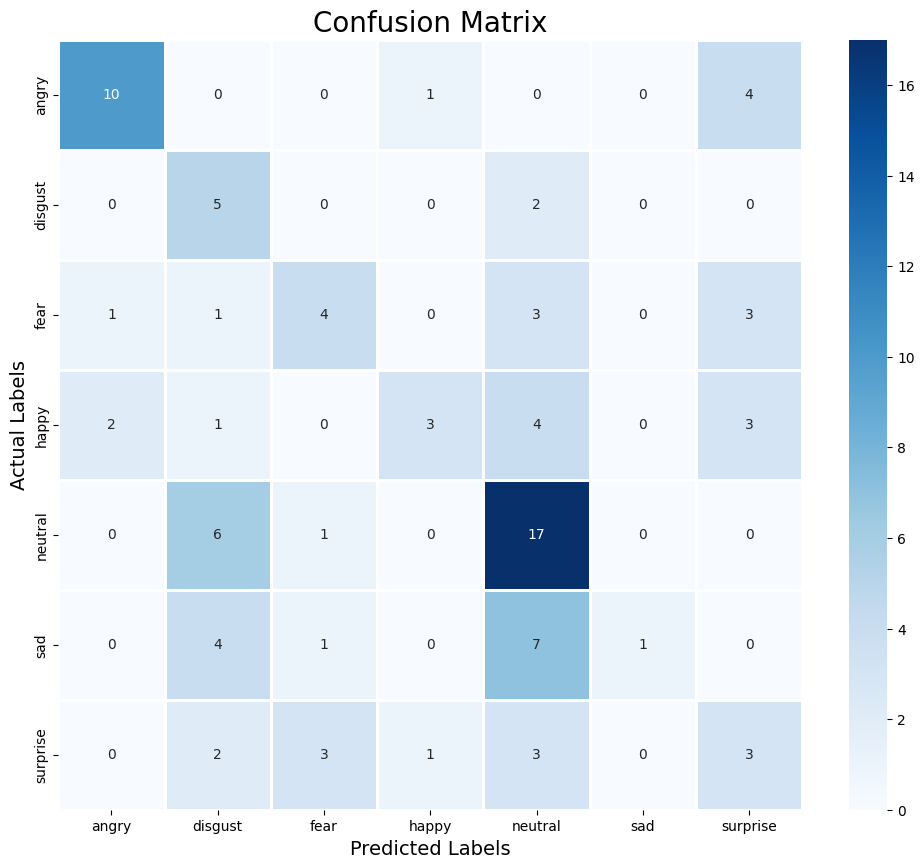

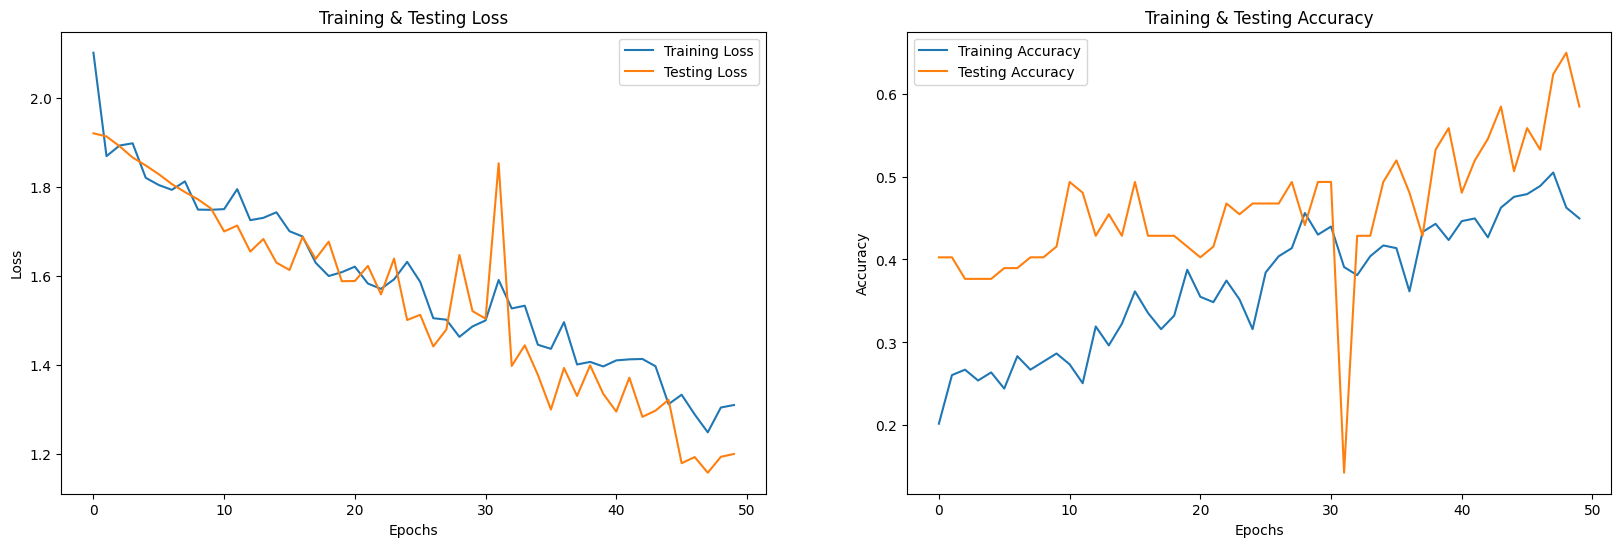

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))

# Modify the line below according to your label encoder
cm = pd.DataFrame(cm, index=[i for i in label_encoder.classes_], columns=[i for i in label_encoder.classes_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='g')  # Use 'g' for integer annotation
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Plotting training and testing loss and accuracy
epochs = [i for i in range(len(history.history['loss']))]  # Update to the number of epochs used
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)

# Plot for Loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")

# Plot for Accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")

plt.show()